# Goal 1: the goal of this project is to get an overview of wage differences in public sector based on gender and institution.

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#reading the data in with cleaning

data2018 = pd.read_csv("data/pohipalk_2018.csv", 
            usecols=lambda x: x not in ['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1','Unnamed: 0'])

data2019 = pd.read_csv("data/pohipalk_2019.csv", 
            usecols=lambda x: x not in ['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1','Unnamed: 0'])

data2020 = pd.read_csv("data/pohipalk_2020.csv", 
            usecols=lambda x: x not in ['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1','Unnamed: 0'])

data2021 = pd.read_csv("data/pohipalk_2021.csv", 
            usecols=lambda x: x not in ['Unnamed: 0.3','Unnamed: 0.2', 'Unnamed: 0.1','Unnamed: 0'])

In [4]:
data2018.describe()
# To get the overall mean

,Ametniku koormus ametkohal,Põhipalk
count,11233.000000,11229.000000
mean,0.985389,1738.576725
std,0.091055,786.591462
min,0.050000,0.000000
25%,1.000000,1250.000000
50%,1.000000,1500.000000
75%,1.000000,2000.560000
max,1.125000,6500.000000


In [15]:
# Differences based on gender
# Find salary means separately for men and women 
# Eventually make a histogram to visualise the differences

data2018_men = data2018[data2018["Sugu"] == "M"]
men2018_salary = data2018_men['Põhipalk']
men18_mean = men2018_salary.mean()

data2018_women = data2018[data2018["Sugu"] == "N"]
women2018_salary = data2018_women['Põhipalk']
women18_mean = women2018_salary.mean()


data2019_men = data2019[data2019["Sugu"] == "M"]
men2019_salary = data2019_men['Põhipalk']
men19_mean = men2019_salary.mean()

data2019_women = data2019[data2019["Sugu"] == "N"]
women2019_salary = data2019_women['Põhipalk']
women19_mean = women2019_salary.mean()


data2020_men = data2020[data2020["Sugu"] == "M"]
men2020_salary = data2020_men['Põhipalk']
men20_mean = men2020_salary.mean()

data2020_women = data2020[data2020["Sugu"] == "N"]
women2020_salary = data2020_women['Põhipalk']
women20_mean = women2020_salary.mean()


data2021_men = data2021[data2021["Sugu"] == "M"]
men2021_salary = data2021_men['Põhipalk']
men21_mean = men2021_salary.mean()

data2021_women = data2021[data2021["Sugu"] == "N"]
women2021_salary = data2021_women['Põhipalk']
women21_mean = women2021_salary.mean()

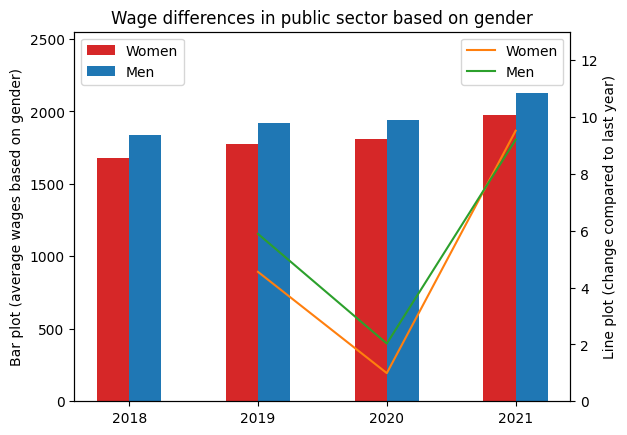

In [61]:
men = [men18_mean, men19_mean, men20_mean, men21_mean]
women = [women18_mean, women19_mean, women20_mean, women21_mean]
men_change = [men19_mean * 100 / men18_mean - 100, men20_mean * 100 / men19_mean - 100, men21_mean * 100 / men20_mean - 100]
women_change = [women19_mean * 100 / women18_mean - 100, women20_mean * 100 / women19_mean - 100, women21_mean * 100 / women20_mean - 100]

n = 4
r = np.arange(n)
width = 0.25
years = ['2018','2019','2020','2021']


fig, axes1 = plt.subplots()
axes2 = axes1.twinx()
plt.title('Wage differences in public sector based on gender')
plt.xticks(r + width/2, years)

axes1.bar(r, women, color='tab:red', width=width, label='Women')
axes1.bar(r + width, men, color='tab:blue', width=width, label='Men')
axes1.set_ylim(0, 2550)
axes1.set_ylabel('Bar plot (average wages based on gender)')

x = r[1:] + (width / 2)
y = men_change
y_2 = women_change
axes2.plot(x, y, color='tab:orange', label='Women')
axes2.plot(x, y_2, color='tab:green', label='Men')
axes2.set_ylim(0, 13)
axes2.set_ylabel('Line plot (change compared to last year)')

axes1.legend(loc='upper left')
axes2.legend(loc='upper right')

plt.savefig('data/wage_differences_public.png', dpi=300, bbox_inches='tight', transparent=True)

In [55]:
# Wage differences based on institution

data2018["Struktuuriüksus"].value_counts()

Õigusteenistus                               260
Maksuauditi osakond                          255
Järelevalveosakond                           213
Teenuste osakond                             198
Kohtunikud                                   163
                                            ... 
Viru malev                                     1
Siseturu valdkond                              1
Sotsiaaldemokraatliku Erakonna fraktsioon      1
Isamaa fraktsioon                              1
Riigikogu esimehe büroo                        1
Name: Struktuuriüksus, Length: 1118, dtype: int64